In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('R2.png',0)          # queryImage
img2 = cv.imread('RC.png',0) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [2]:
cv.xfeatures2d.SIFT_create

<function SIFT_create>

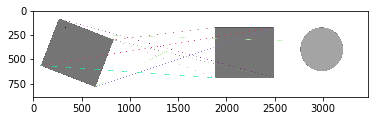

(<matplotlib.image.AxesImage at 0x194af368f28>, None)

In [3]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.imshow(img3),plt.show()

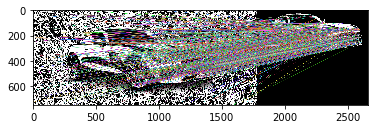

(<matplotlib.image.AxesImage at 0x194b0f22908>, None)

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread('car3.png',0)          # queryImage
img2 = cv.imread('car4.png',0) # trainImage
# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()
#sift = cv.SIFT()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None, flags=2)
plt.imshow(img3),plt.show()

In [ ]:
plt.imshow(img3),plt.show()

In [ ]:
cv.imshow('image',img3)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
des1

In [1]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

In [2]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

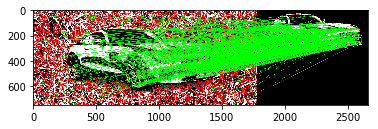

(<matplotlib.image.AxesImage at 0x176587afcf8>, None)

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread('car3.png',0)          # queryImage
img2 = cv.imread('car4.png',0) # trainImage
# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()
#sift = cv.SIFT()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

In [8]:
cv.imshow('image',img3)
cv.waitKey(0)
cv.destroyAllWindows()